In [2]:
import os
import matplotlib.pyplot as plt
import pysam

import lakeview as lv

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 72

## Download data

In [3]:
REGION = "20:57413000-57488000"
EXON_BAM_URL = "ftp://ftp-trace.ncbi.nlm.nih.gov/ReferenceSamples/giab/data/AshkenazimTrio/HG002_NA24385_son/OsloUniversityHospital_Exome/151002_7001448_0359_AC7F6GANXX_Sample_HG002-EEogPU_v02-KIT-Av5_AGATGTAC_L008.posiSrt.markDup.bam"
EXON_BAI_URL = "ftp://ftp-trace.ncbi.nlm.nih.gov/ReferenceSamples/giab/data/AshkenazimTrio/HG002_NA24385_son/OsloUniversityHospital_Exome/151002_7001448_0359_AC7F6GANXX_Sample_HG002-EEogPU_v02-KIT-Av5_AGATGTAC_L008.posiSrt.markDup.bai"
EXON_BAM_PATH = "data/Illumina_WES.bam"
EXON_BAI_PATH = "data/Illumina_WES.bam.bai"

lv.helpers.download_bam(EXON_BAM_URL, EXON_BAI_URL, REGION, EXON_BAM_PATH, EXON_BAI_PATH)

## Load data

In [4]:
painter = lv.SequenceAlignment.from_file(EXON_BAM_PATH, "rb")
painter.segments = [seg for i, seg in enumerate(painter.segments) if i % 20 == 0]
len(painter.segments)

754

## Plotting

/workspace/lakeview/src/lakeview/widget.py:54: UserWarning: Backend ipympl not activated. Current backend: module://matplotlib_inline.backend_inline. To enable additional interactive functionality, please activate ipympl using `%matplotlib widget`.
  warn(


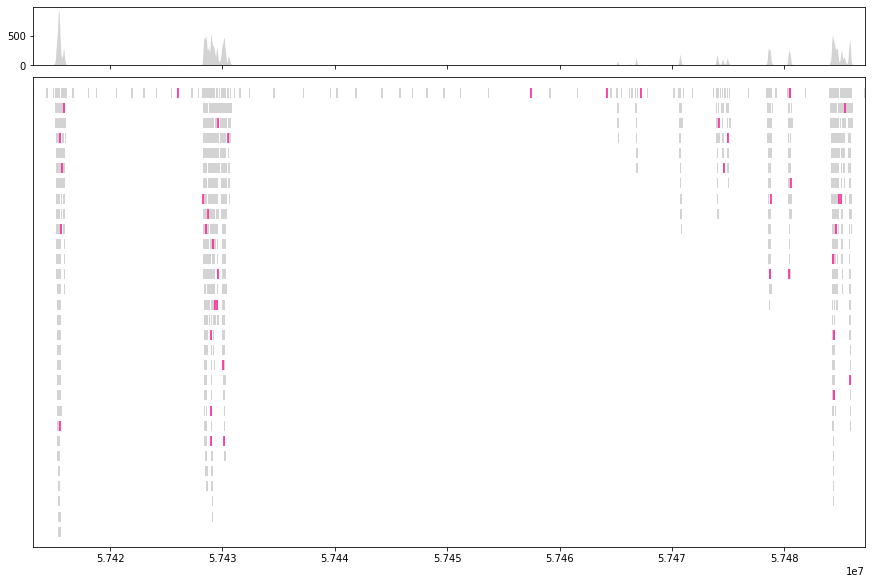

In [5]:
plt.ioff()
gv = lv.GenomeViewer(2, height_ratios=(1, 8), figsize=(12, 8))
painter.draw_pileup(gv.axes[0], show_mismatches=False)
painter.draw_alignment(gv.axes[1], show_mismatches=False, show_arrowheads=False, max_depth=30)

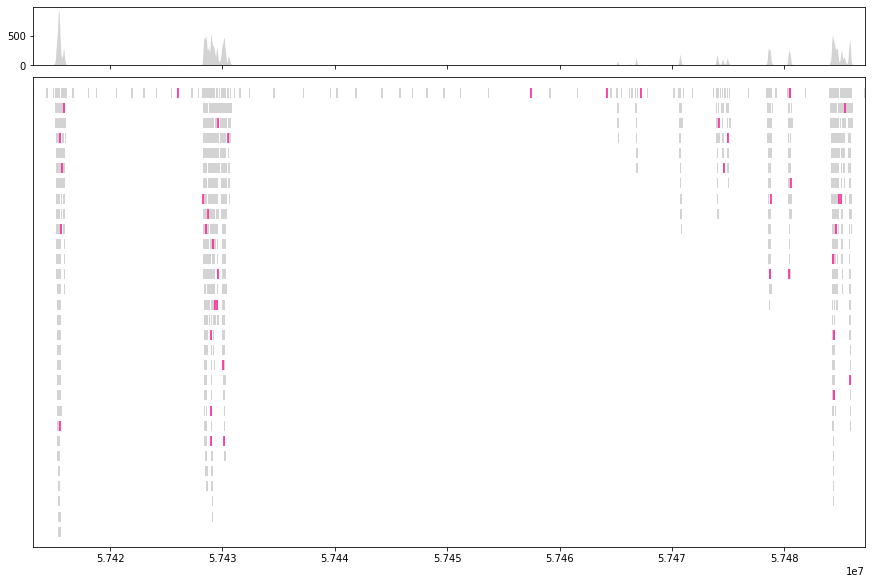

In [6]:
gv.figure